In [1]:
import os
TEUFEL_ROOT = os.path.abspath("..")
os.chdir(TEUFEL_ROOT)

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

TEUFEL - THz Emission from Undulators and Free-Electron Lasers


In [2]:
mec2 = sc.m_e * sc.c**2 / sc.e
λ = 1e-4
ω = 2*sc.pi*sc.c/λ
k = ω/sc.c
print(f'k = {0.01*k:.2f}/cm')
λU = 0.1
kU = 2*sc.pi/λU
E_kin = 30.0e6
γ = E_kin / mec2 + 1
print(f'γ = {γ:.3f}')
K = np.sqrt(2.0*(λ/λU * 2*γ**2 -1.0))
print(f'K = {K:.3f}')

k = 628.32/cm
γ = 59.709
K = 3.501


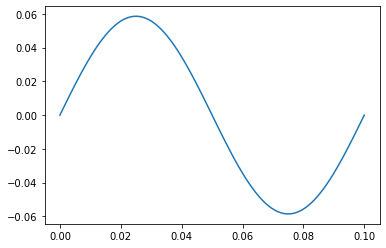

In [3]:
βx = lambda z: K/γ * np.sin(kU*z)

z_range = np.linspace(0,λU,100)
plt.plot(z_range,βx(z_range))
plt.show()

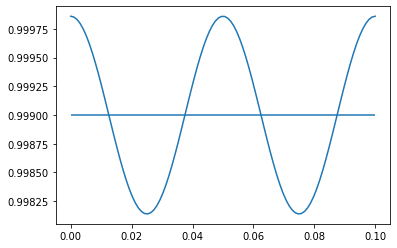

In [4]:
βz = lambda z: np.sqrt(1.0 - 1.0/γ**2 - βx(z)**2)
βz_star = 1.0 - λ/λU

plt.plot(z_range,βz(z_range))
plt.hlines(βz_star,0,λU)
plt.show()

In [5]:
f = lambda z: 1.0/βz(z)
ct = lambda z: scipy.integrate.quad(f, 0, z)[0]

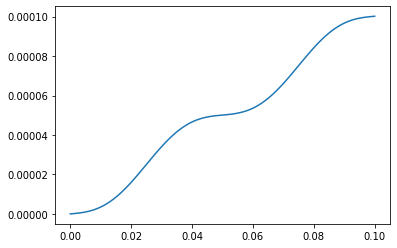

In [6]:
ct_range = np.array([ct(z) for z in z_range])
plt.plot(z_range,ct_range-z_range)
plt.show()

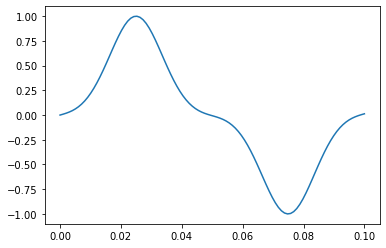

In [7]:
Ex = lambda z: np.sin(k*ct(z) - k*z)

Ex_range = np.array([Ex(z) for z in z_range])
plt.plot(z_range,Ex_range)
plt.show()

In [8]:
f2 = lambda z: np.sin(kU*z)*Ex(z)
FF = scipy.integrate.quad(f2, 0, λU)[0] / λU
FF

0.3710602007241054

In [9]:
E0 = 1e6
Δγ = sc.e/(sc.m_e*sc.c**2)*E0*K/γ*λU*FF
print(f'Δγ = {Δγ:.6f}')

Δγ = 0.004258


# Run modulation test case with \<wave\> lattice element 

In [10]:
! ./build/teufel tests/fel_modulation.xml


 TEUFEL 0.10.01

 THz-Emission From Undulators and Free-Electron Lasers


 TEUFEL parallel computing on 1 nodes.

node 0 : fwl78 PID=18667 total memory 8048.77 MB using 4 parallel threads
node 0 memory usage : 191.136 MB

reading XML input from tests/fel_modulation.xml
input parsed without errors
case : Energy modulation of an electron beam by FEL interaction with an electromagnetic wave inside an undulator
by : Ulf Lehnert 23.4.2023

calc : beam kinetic energy [eV] = 3e+07
calc : gamma = 59.7085
calc : resonance wavelength [m] = 0.0001
calc : tracking length [m] = 2.0014
calc : tracking total time [s] = 6.67595e-09
calc : dt = 1.66899e-12
calc : K(U100) = 3.50149
U100::PlanarUndulator
calc : K(U100) = 3.50149
planar undulator  N = 14,  lambda = 0.1,  K(rms) = 2.47593
calc : Rayleigh range [m] = 100
calc : waist radius w0 [m] = 0.056419
calc : peak field E0 [V/m] = 1e+06
seed::GaussianWave
gaussian wave  E0 = 1e+06 V/m   w0 = 0.056419 m   Ptot = 6.63605e+06 W

lattice of 2 elements cr

In [10]:
initial = TeufelWatch.read('fel-modulation_initial.h5')
print(np.mean(initial.z))
z_plot = initial.z
print()
final = TeufelWatch.read('fel-modulation_final.h5')
print(np.mean(final.z))
print()
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

reading  fel-modulation_initial.h5
have read 200 particles.
4.954285759439334e-06

reading  fel-modulation_final.h5
have read 200 particles.
4.954285759439334e-06

0.0 0.0


In [16]:
final.z

array([ 2.11443356e-05,  3.79345335e-05,  9.49386040e-05,  3.82529444e-05,
        9.37979646e-08, -1.91649800e-05,  6.71578375e-07, -3.44708632e-05,
       -7.07069957e-05, -3.20922176e-05,  9.74446392e-05, -5.33972651e-05,
       -1.41190032e-05, -3.25911800e-05,  4.15600466e-05, -4.17892316e-05,
       -7.33064017e-05, -3.90463422e-05, -3.68708244e-05,  4.27253901e-05,
       -2.86441824e-05, -7.13309974e-06,  1.02753931e-05,  2.67347379e-05,
       -5.74260218e-07,  4.93909366e-05, -2.15380963e-06,  6.73440146e-05,
       -6.12204655e-05, -7.59620589e-05, -1.14888182e-04, -1.39290156e-05,
        1.33533470e-05, -4.34439592e-05,  5.07437291e-05,  3.57592560e-05,
        5.55956426e-05, -6.07868130e-06,  2.59702438e-05,  2.71827323e-05,
       -2.24648685e-05,  2.00591561e-05,  3.75382314e-05, -4.94871013e-05,
        8.72290473e-06,  7.08631790e-05, -7.67505414e-05,  7.38200635e-06,
        3.76235057e-05, -1.43372189e-05, -8.69622427e-05, -6.41819754e-05,
        3.41414651e-05,  

In [12]:
initial = TeufelWatch.read('fel-modulation_start.h5')
print(np.mean(initial.z))
print()
final = TeufelWatch.read('fel-modulation_stop.h5')
print(np.mean(final.z))
print()
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

reading  fel-modulation_start.h5
have read 500 particles.
0.5001201609814848

reading  fel-modulation_stop.h5
have read 500 particles.
1.4998185877973473

-0.04274835822025835 0.04271361943166596


-0.04274835822025835 0.04271361943166596


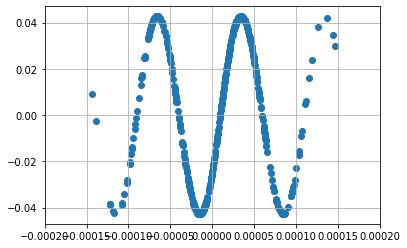

In [13]:
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

plt.scatter(z_plot,dg)
plt.xlim(-0.0002, 0.0002)
plt.grid()
plt.show()

# Run modulation test case with \<fel1d\> interaction

In [58]:
! ./build/teufel tests/fel1d_modulation.xml


 TEUFEL 0.10.01

 THz-Emission From Undulators and Free-Electron Lasers


 TEUFEL parallel computing on 1 nodes.

node 0 : fwl78 PID=21207 total memory 8048.77 MB using 4 parallel threads
node 0 memory usage : 191.052 MB

reading XML input from tests/fel1d_modulation.xml
input parsed without errors
case : Energy modulation of an electron beam by FEL interaction with an electromagnetic wave inside an undulator
by : Ulf Lehnert 25.4.2023

calc : beam kinetic energy [eV] = 3e+07
calc : gamma = 59.7085
calc : resonance wavelength [m] = 0.0001
calc : tracking length [m] = 2.0014
calc : tracking total time [s] = 6.67595e-09
calc : dz = 4e-06
calc : dt = 1.33426e-14
calc : tracking steps = 500350
calc : K(U100) = 3.50149
U100::PlanarUndulator
calc : K(U100) = 3.50149
planar undulator  N = 14,  lambda = 0.1,  K(rms) = 2.47593

lattice of 1 elements created.


beam of 1 bunches created.
total number of particles : 200
total charge : 1.60218e-10nC

FEL-1D interaction  N=10000,   dz=4e-06 m
  pr

In [59]:
initial = TeufelWatch.read('fel-modulation_initial.h5')
print(np.mean(initial.z))
z_plot = initial.z
print()
final = TeufelWatch.read('fel-modulation_final.h5')
print(np.mean(final.z))
print()
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

reading  fel-modulation_initial.h5
have read 200 particles.
-1.0150185085379517e-06

reading  fel-modulation_final.h5
have read 200 particles.
1.9999298630014615

-0.059600967855139686 0.05968091231572714


In [60]:
initial = TeufelWatch.read('fel-modulation_start.h5')
print(np.mean(initial.z))
print()
final = TeufelWatch.read('fel-modulation_stop.h5')
print(np.mean(final.z))
print()
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

reading  fel-modulation_start.h5
have read 200 particles.
0.5001132027537181

reading  fel-modulation_stop.h5
have read 200 particles.
1.499811755216955

-0.04248644702750681 0.042450700920547035


-0.04248644702750681 0.042450700920547035


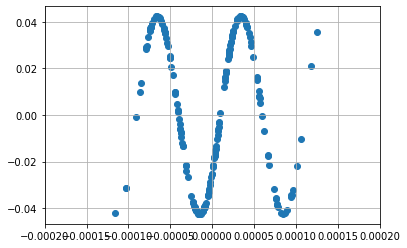

In [62]:
dg = final.gamma-initial.gamma
print(np.min(dg),np.max(dg))

plt.scatter(z_plot,dg)
plt.xlim(-0.0002, 0.0002)
plt.grid()
plt.show()

### show trajectories

In [63]:
filename = "fel1d_trajectories.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')

reading  fel1d_trajectories.hdf5

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (5004, 100, 6) array.


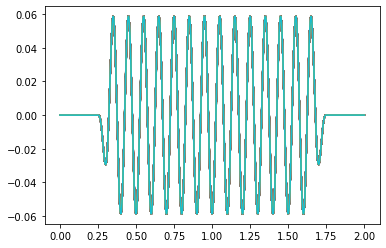

In [64]:
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    plt.plot(z,bgx/gamma)
    
plt.show()

0.059640940041866486 59.64893498721959 59.76821686730332


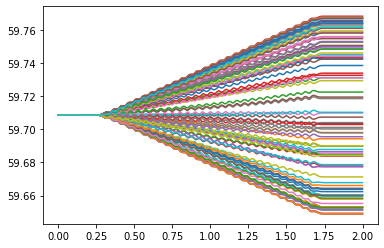

In [65]:
gam_list = []
for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    gam_list.append(gamma[-1])
    plt.plot(z,gamma)
    
gmin = np.min(gam_list)
gmax = np.max(gam_list)
print((gmax-gmin)/2, gmin, gmax)
plt.show()

### show interaction fields

In [66]:
filename = "fel1d.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
fields = hdf['InteractionField']
# print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
N_output = fields.attrs['N_output']
dt = fields.attrs['dt']
prop = np.array([fields.attrs['prop.x'], fields.attrs['prop.y'], fields.attrs['prop.z']])
origin = np.array([fields.attrs['origin.x'], fields.attrs['origin.y'], fields.attrs['origin.z']])
print(f'field size = {N_field},  steps = {N_steps},  output every {N_output} steps,  dt = {dt:.4g} s')
print('propagation step = ',prop)
print('origin position = ',origin)

a = np.array(fields)
hdf.close()

print(f'have read {a.shape} array.')


reading  fel1d.hdf5

field size = 10000,  steps = 5004,  output every 100 steps,  dt = 1.334e-14 s
propagation step =  [-0.e+00 -0.e+00 -4.e-06]
origin position =  [0.   0.   0.02]
have read (5004, 10000) array.


3.130417577329623e-06


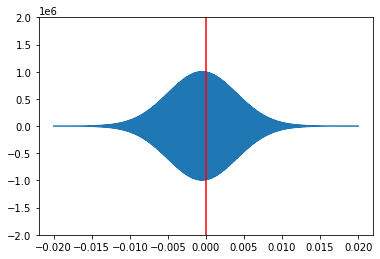

In [67]:
step = 0
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,2]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.ylim(-2e6,2e6)
plt.vlines(z_bunch, -2e6,2e6, color='r')
plt.show()

1.9997340385362172


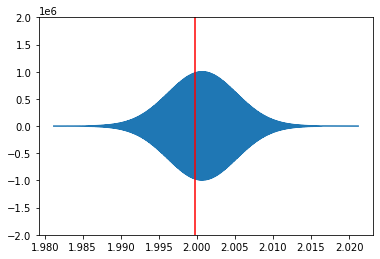

In [68]:
step = 5003
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,2]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.ylim(-2e6,2e6)
plt.vlines(z_bunch, -2e6,2e6, color='r')
plt.show()